#### Sample Data Load ImageDataGenerator for Augmentation (pic)

------------------

In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

os.makedirs('sample/dogs', exist_ok = True)
os.makedirs('sample/cats', exist_ok = True)

In [2]:
datagen = ImageDataGenerator(rotation_range = 60)

train_generator = datagen.flow_from_directory('sample', target_size=(300,300), batch_size=1)

train_generator.num_classes, train_generator.samples

Found 2 images belonging to 2 classes.


(2, 2)

#### Random Rotation Augmentation

---------------------

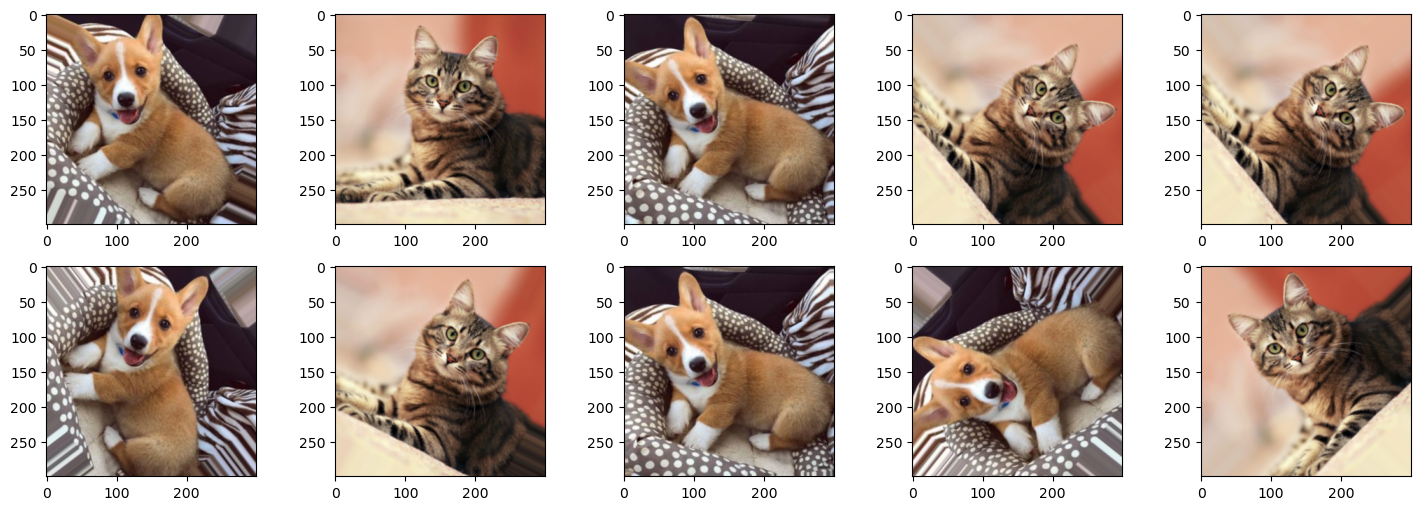

In [3]:
# subplot of 2x5 -> 10
def plot_images(train_generator):
    plt.figure(figsize=(18,6))
    for i in range(10):
        plt.subplot(2,5,i+1)
        batch = train_generator.next()
        image = batch[0].astype('uint8')
        plt.imshow(image[0])
    
    plt.show()

plot_images(train_generator)

#### Random Shift Augmentation

------------------------

Found 2 images belonging to 2 classes.


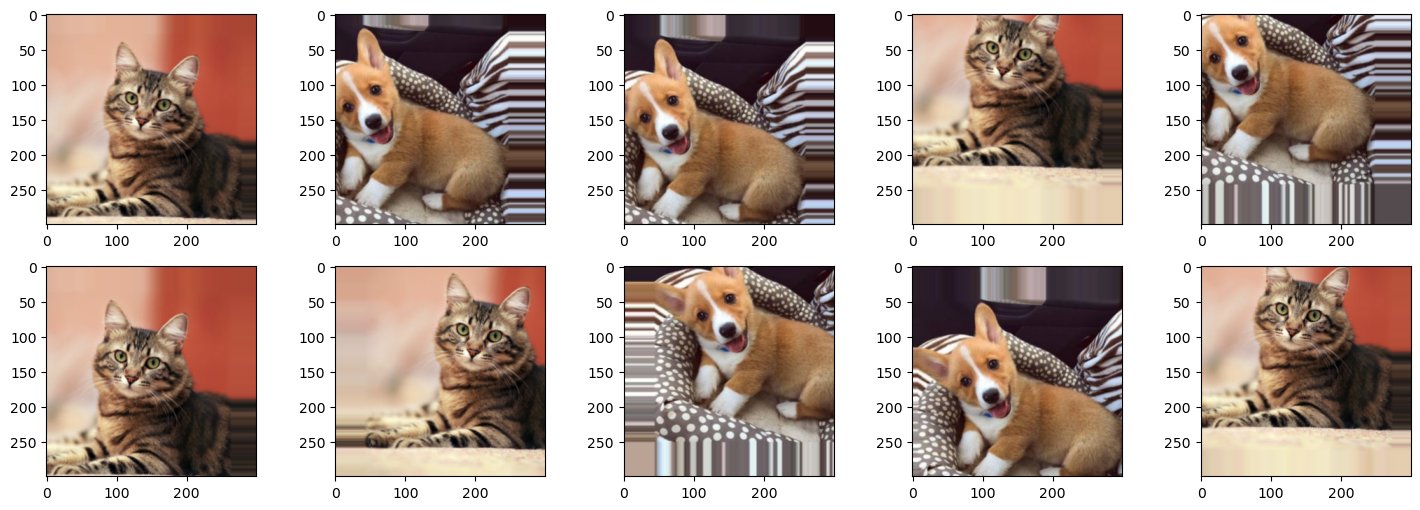

In [4]:
#random shift
datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)

train_generator = datagen.flow_from_directory('sample', target_size=(300,300), batch_size=1)
plot_images(train_generator)

#### Other types of Data Augmentation

--------------------------

Found 2 images belonging to 2 classes.


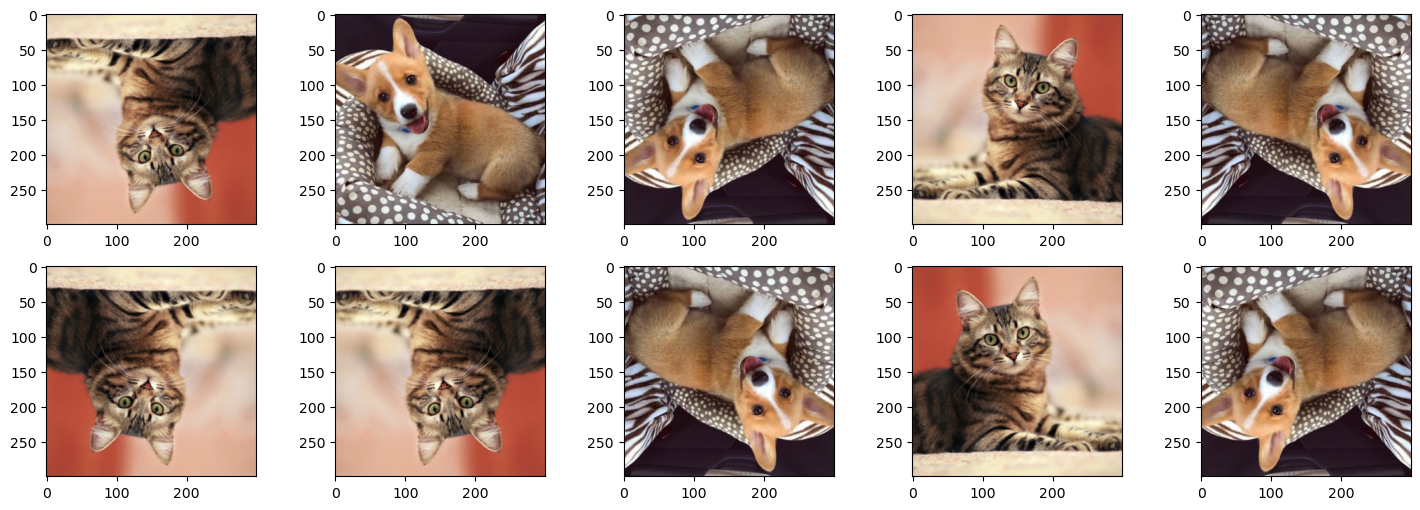

In [5]:
#random flip
datagen = ImageDataGenerator(horizontal_flip= True , vertical_flip= True)

train_generator = datagen.flow_from_directory('sample', target_size=(300,300), batch_size=1)
plot_images(train_generator)

Found 2 images belonging to 2 classes.


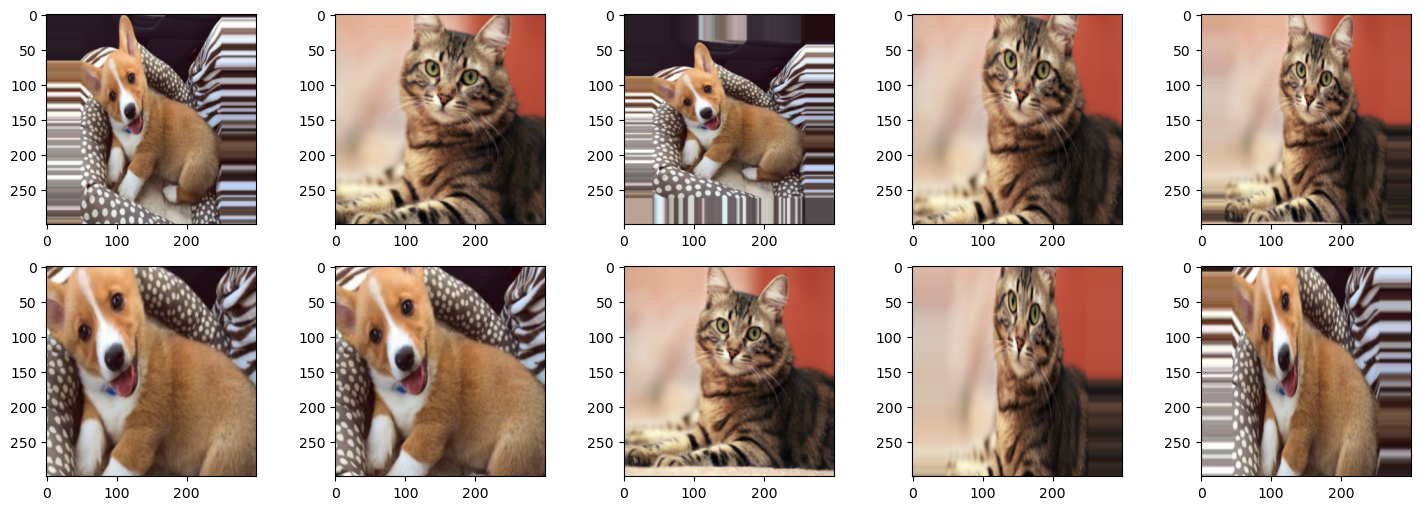

In [6]:
#random zoom
datagen = ImageDataGenerator(zoom_range=0.5)

train_generator = datagen.flow_from_directory('sample', target_size=(300,300), batch_size=1)
plot_images(train_generator)

Found 2 images belonging to 2 classes.


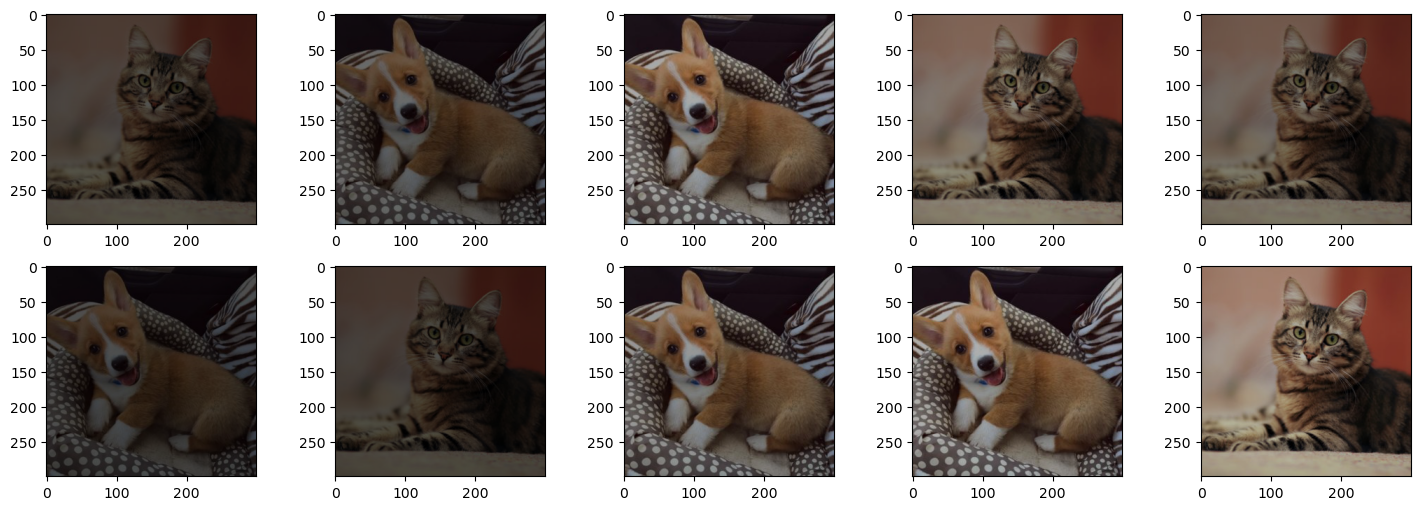

In [7]:
#random brightness
datagen = ImageDataGenerator(brightness_range=[0.3, 0.8])

train_generator = datagen.flow_from_directory('sample', target_size=(300,300), batch_size=1)
plot_images(train_generator)

Found 2 images belonging to 2 classes.


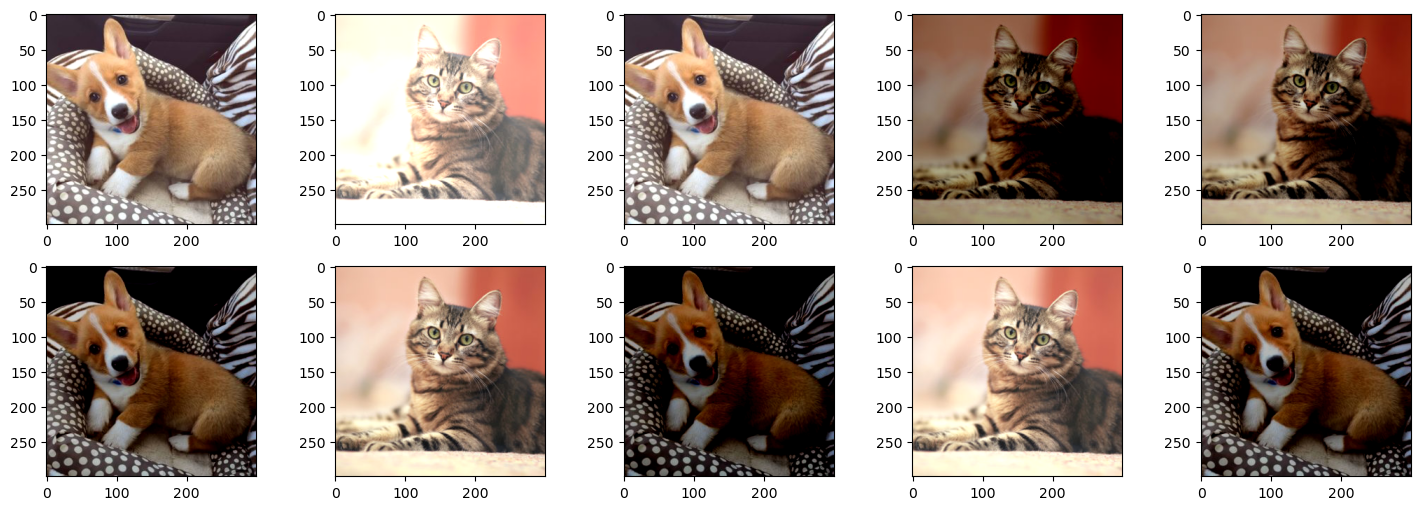

In [8]:
#random channel shift
datagen = ImageDataGenerator(channel_shift_range=100)

train_generator = datagen.flow_from_directory('sample', target_size=(300,300), batch_size=1)
plot_images(train_generator)

Found 2 images belonging to 2 classes.


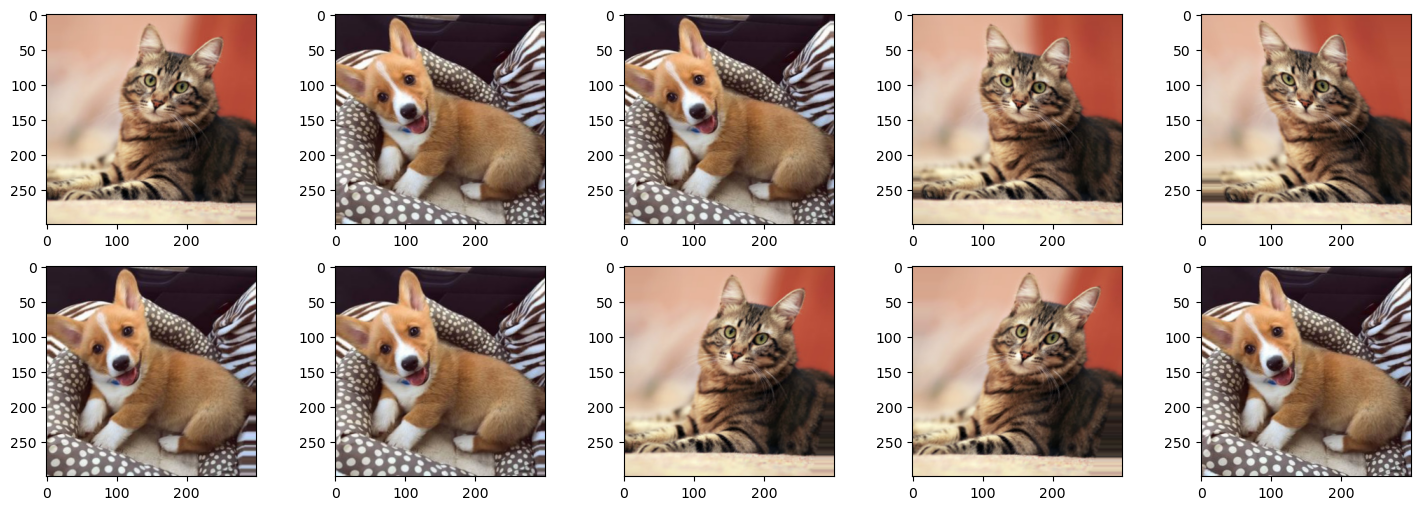

In [9]:
#random shear
datagen = ImageDataGenerator(shear_range=20)

train_generator = datagen.flow_from_directory('sample', target_size=(300,300), batch_size=1)
plot_images(train_generator)

#### All types of Augmentation Once

----------------

Found 2 images belonging to 2 classes.


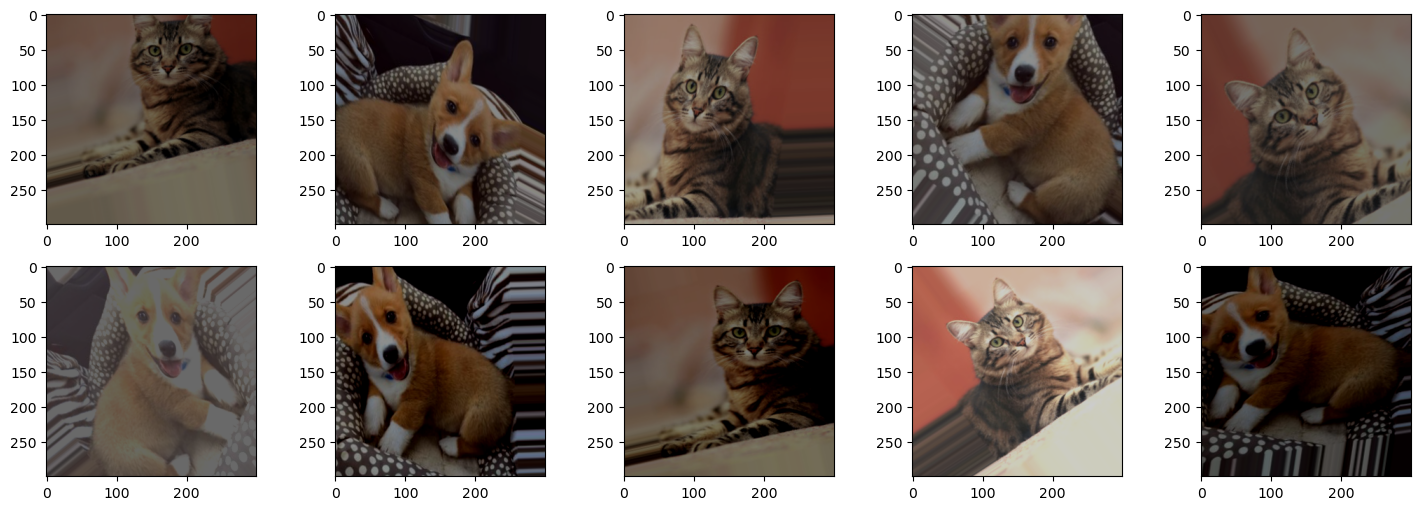

In [10]:
# All types of data Augmentation

datagen = ImageDataGenerator(rotation_range=40, width_shift_range= 0.2, height_shift_range=0.2, shear_range=20, zoom_range=0.2, horizontal_flip=True, channel_shift_range=100, brightness_range=[0.4, 0.9])

train_generator = datagen.flow_from_directory('sample', target_size=(300,300), batch_size=1)

plot_images(train_generator)

#### Tensorflow TFDS & Cats vs Dogs data download

-----------------


In [11]:
# !pip install tensorflow_datasets

import tensorflow as tf
import tensorflow_datasets as tfds
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [12]:
#datasets, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True)


#### Store Data in Local Directory

----------------

In [13]:
# # info

# features=FeaturesDict({
#     'image': Image(shape=(None, None, 3)), dtype=uint8),
#     'image/filename': Text(shape=(), dtype=string),
#     'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
# }),
# supervised_keys=('image', 'label')

In [14]:
# class_names = info.features['label'].names

In [15]:
# for i, example in enumerate(datasets['train']):
#     image, label = example
#     save_dir= 'cats_vs_dogs/{}'.format(class_names[label])
#     filepath_name = save_dir + "/" + str(i) + ".jpg"
#     os.makedirs(save_dir, exist_ok=True)

#     tf.keras.preprocessing.image.save_img(filepath_name, image.numpy())

#### Load Dataset for Baseline Classifier

------------------------------

In [16]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
# datagen = ImageDataGenerator(validation_split=0.2)

# train_generator = datagen.flow_from_directory('cats_vs_dogs', target_size=(228,228), batch_size=32, class_mode='binary', subset='training')

# validation_generator = datagen.flow_from_directory('cats_vs_dogs', target_size=(228,228), batch_size=32, class_mode='binary', subset='validation')



In [18]:
# plot_images(train_generator)  #remove rescale=1/255 for visualization

#### Building Baseline CNN Classifier

----------------------

In [19]:
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
# from tensorflow.keras.models import Sequential

In [20]:
# def get_base_model():
#     model = Sequential()
#     model.add(Conv2D(32, (3,3), activation='relu', input_shape=(228,228,3)))
#     model.add(MaxPooling2D(2,2))

#     model.add(Conv2D(64, (3,3), activation='relu'))
#     model.add(MaxPooling2D(2,2))

#     model.add(Conv2D(128, (3,3), activation='relu'))
#     model.add(MaxPooling2D(2,2))

#     model.add(Flatten())
#     model.add(Dense(512, activation='relu'))
#     model.add(Dense(1, activation='sigmoid'))

#     return model
    

In [21]:
# model = get_base_model()
# model.summary()

#### How to calculate size of output layers

-----------------------------

- size of output CNN layer
- size of maxpool layer
- number of parameter for CNN
- number of parameter for FCN

In [22]:
# size of output CNN layer
# input_size - (filter_size - 1) when stride_size = 1
# output_size = floor((input_size + 2*padding - (kernel_size - 1) -1)/stride + 1)

In [23]:
#1st cnn layer, 1st maxpool
np.floor((228 + 2*0 - (3-1)-1)/1 + 1), np.floor((226 + 2*0 - (2-1)-1)/2 + 1)

(226.0, 113.0)

In [24]:
#2st cnn layer, 2st maxpool
np.floor((113 + 2*0 - (3-1)-1)/1 + 1), np.floor((111 + 2*0 - (2-1)-1)/2 + 1)

(111.0, 55.0)

#### How to Calculate Number of Parameters in CNN & FCN

----------------------------------

In [25]:
# No of Param for CNN
# (prev layer channel*(filter_size x filter_size) + 1) *#channel in current layer
# conv2d(Conv2D) (None, 226, 226, 32) 896
(3*(3*3)+1)*32 , (32*(3*3)+1)*64, (64*(3*3)+1)*128

(896, 18496, 73856)

In [29]:
# no of param for FCN (Fully-Connected Network)
# (#prev_input + 1)*#cell_in_current_layer
26*26*128, (86528+1)*512, (512+1)*1

(86528, 44302848, 513)

#### Model Training & Layers Analysis

---------------------------------------